# Predicting Single Family Homes Price using Machine Learning (Frederick, MD) - Sushanta Shrestha


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
df = pd.read_csv("SFD_Sold.csv")


In [26]:
# Define the features (input variables) and target (output to predict)

features = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'ZIP OR POSTAL CODE']
target = 'PRICE'


In [27]:
# Drop rows that contain missing values in the selected columns

df_clean = df.dropna(subset=features + [target])


In [28]:
# Split the dataset into 80% training and 20% testing sets

X = df_clean[features]
y = df_clean[target]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Three regression models to compare

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}


In [31]:
#  Train each model, make predictions, and evaluate using R² and RMSE

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': name,
        'R² Score': round(r2, 2),
        'RMSE (USD)': round(rmse, 2)
    })


In [32]:
results_df = pd.DataFrame(results)
print(results_df)


               Model  R² Score  RMSE (USD)
0  Linear Regression     -0.97   290587.45
1      Random Forest      0.65   122234.62
2  Gradient Boosting      0.67   117976.13


### The best model for predicting home prices is the Gradient Boosting because it provides the most accurate and reliable predictions. It has the highest R² score and lowest RMSE score compared to the other two models. 

In [33]:
# Predict the price of a new home using the best model: Gradient Boosting
predicted_price = models['Gradient Boosting'].predict(pd.DataFrame([{
    'BEDS': 4,
    'BATHS': 3,
    'SQUARE FEET': 3500,
    'LOT SIZE': 6000,
    'YEAR BUILT': 2025,
    'ZIP OR POSTAL CODE': 21703
}]))

print(f"Predicted Price using Gradient Boosting: ${predicted_price[0]:,.2f}")



Predicted Price using Gradient Boosting: $685,484.74


### Based on the trained Gradient Boosting model, the pricing for new home with the listed features is $685,484

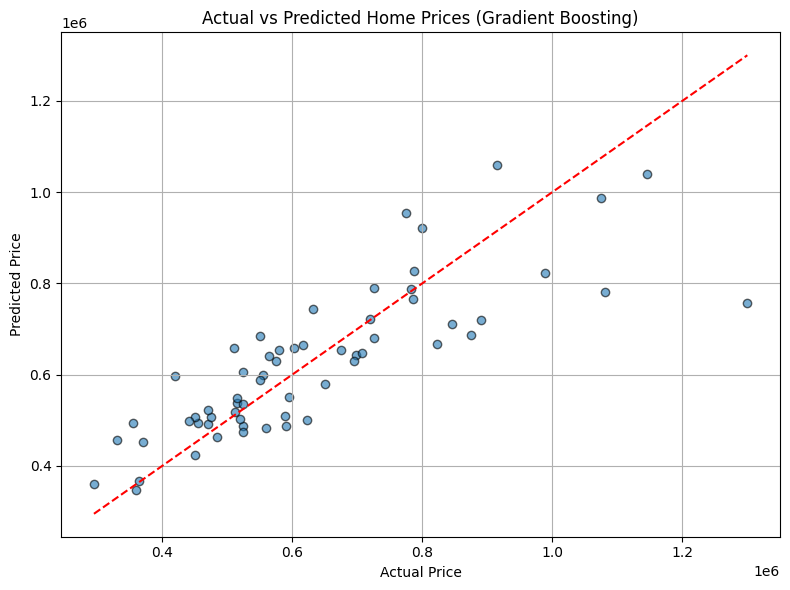

In [34]:
#Gradient Boosting predictions 
y_pred = models['Gradient Boosting'].predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Home Prices (Gradient Boosting)") 
plt.grid(True)
plt.tight_layout()
plt.savefig("Line Chart.png", dpi=300) 
plt.show()






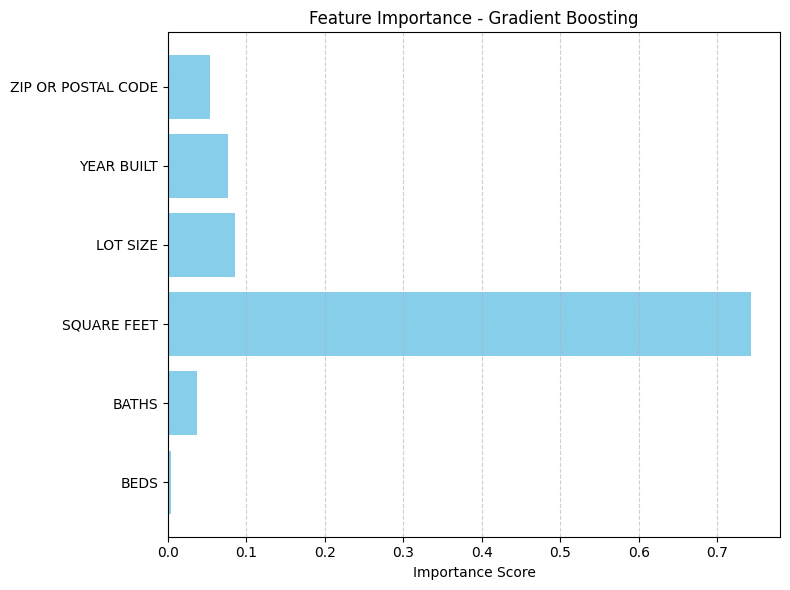

In [35]:
importances = models['Gradient Boosting'].feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance - Gradient Boosting")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("barchart.png", dpi=300)
plt.show()


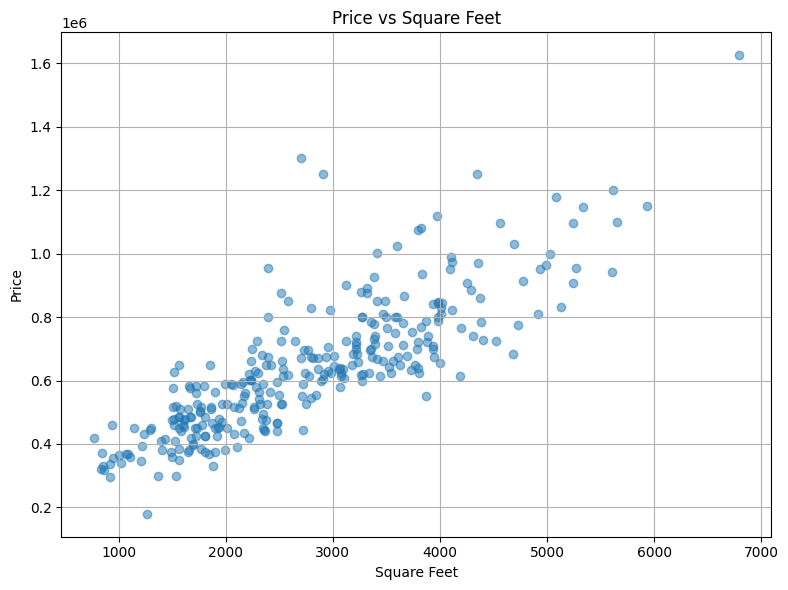

In [36]:
# 📊 CHART 6: Price vs Square Feet
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['SQUARE FEET'], df_clean['PRICE'], alpha=0.5)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Price vs Square Feet")
plt.grid(True)
plt.tight_layout()
plt.savefig("price vs sqft.png", dpi=300)
plt.show()